<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a>

# Отток клиентов
# Churn clients

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
pth1 = 'Churn.csv'
pth2 = '/datasets/Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)#, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)#, sep='\t')
else:
    print('Something is wrong')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


In [5]:
#проверка полных дубликатов строк
df.duplicated().sum()

0

In [6]:
#Проверка на уникальность ID клиента
df.CustomerId.value_counts().sum()

10000

все ID уникальны и повторений нет

In [7]:
#Наименования столбцов датафрейма
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# список столбцов, исключая столбцы 'RowNumber', 'CustomerId', 'Surname' 'CreditScore' 'Balance' 'EstimatedSalary'
list_columns = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [9]:
#просмотр уникальных значений столбцов
for j in list_columns:
    
    print(j, sorted(df[j].unique()))
    print()

Geography ['France', 'Germany', 'Spain']

Gender ['Female', 'Male']

Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92]

Tenure [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

NumOfProducts [1, 2, 3, 4]

HasCrCard [0, 1]

IsActiveMember [0, 1]

Exited [0, 1]



###### Дополнительное исследование столбцов

In [10]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: >

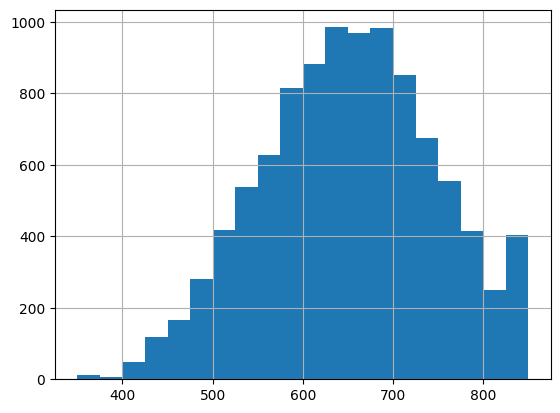

In [11]:
df.CreditScore.hist(bins=20)

Практически нормальное распределение, есть небольшой выборос в области больших значений `CreditScore` 

In [12]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: >

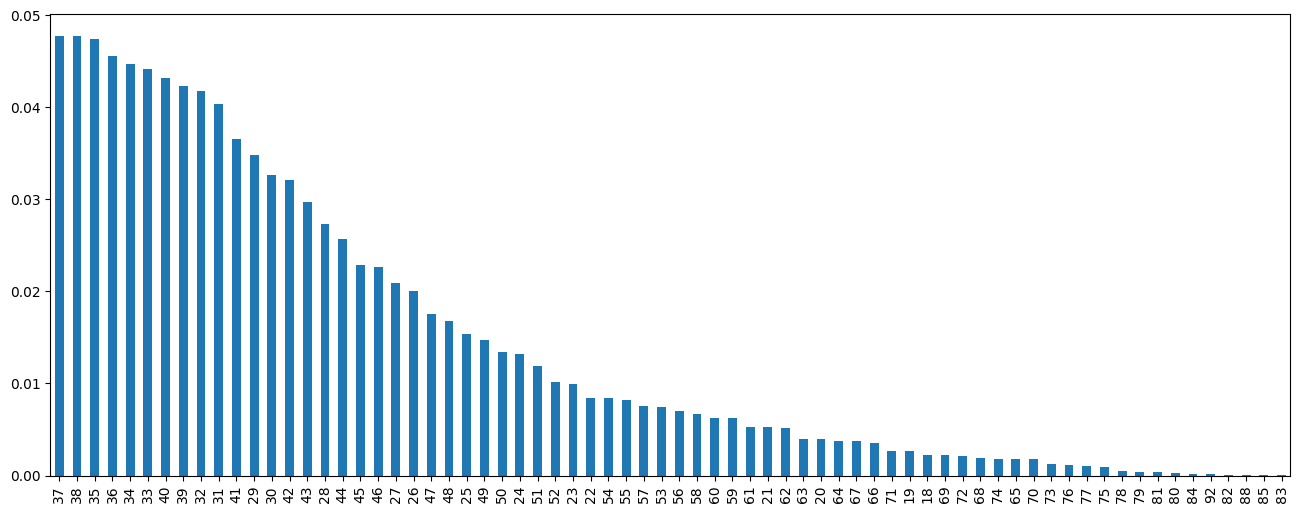

In [13]:
df.Age.value_counts(normalize=True).plot(kind='bar', figsize=(16,6))

<Axes: >

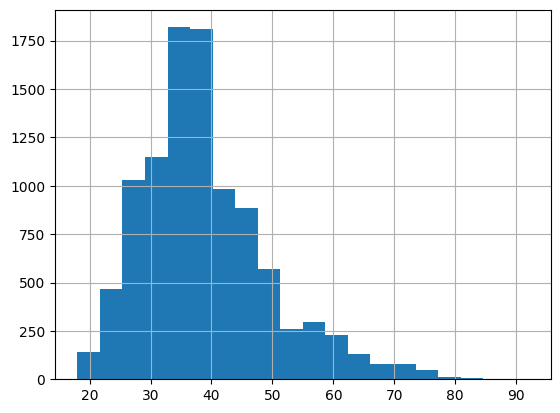

In [14]:
df.Age.hist(bins=20)

Распределение возраста клиента близко к нормальному, имеется небольшой скос вправо. 
Скорее всего небольшой скос связан с тем что кредиты ниже 18 лет банк не выдает.

In [15]:
df.Tenure.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

<Axes: >

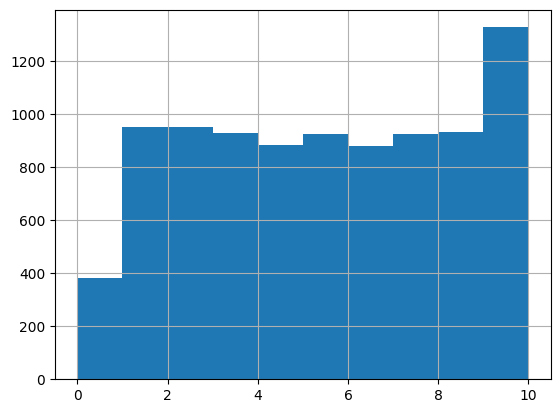

In [16]:
df.Tenure.hist(bins=10)

Практически равномерное распределение. То есть Люди являются клиентами банка примерно одинаковое количество лет.

In [17]:
df.Tenure.isna().sum()

909

In [18]:
909/10000*100

9.09

В этом столбце примерно 9% значений пропущено. 

Распределение показанное выше, равномерное (кроме нуля и 10 лет), значит с одинаковой долей вероятности эти пропущенные люди принадлежат к одной из этих групп.

В нуле имеется провал, а на 10 годах некоторое увеличение, и вероятнее всего эти пропущенные значения нулевые.

Произведу замену пропущенных значений на нулевые

In [19]:
df.Tenure = df.Tenure.fillna(0)

In [20]:
df.Tenure.isna().sum()

0

<Axes: >

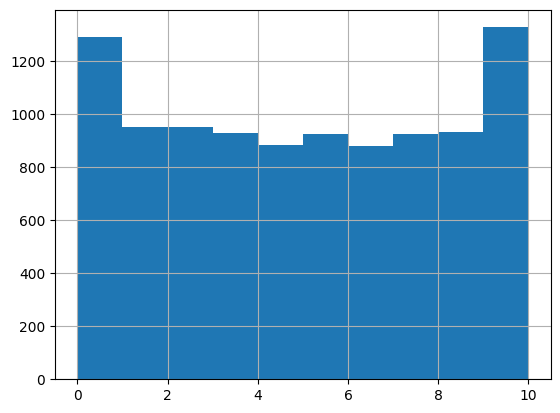

In [21]:
#проверка распределения после замены
df.Tenure.hist(bins=10)

In [22]:
#перевод столбца в Int
df.Tenure = df.Tenure.astype('Int64')

In [23]:
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<Axes: >

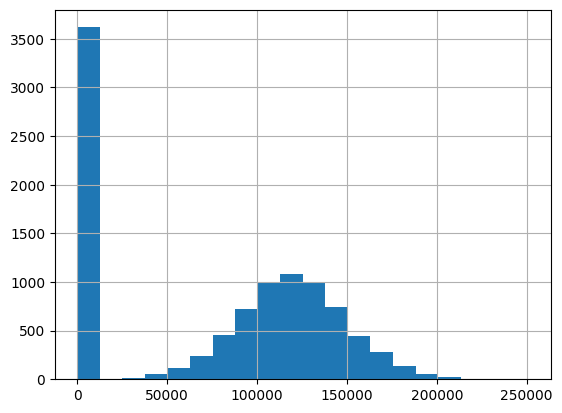

In [24]:
df.Balance.hist(bins=20)

Много клиентов имеют нулевой баланс на счёте в этом банке.

<Axes: >

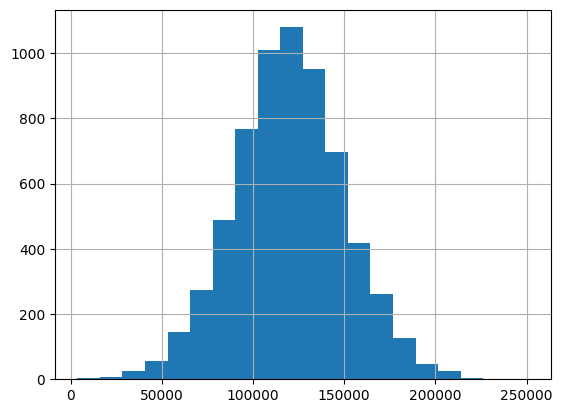

In [25]:
#распределение для клиентов имеющих не нулевой балланс
df.query('Balance != 0').Balance.hist(bins=20)

Распределение полностью нормальное (исключая клиентов с нулевым баллансом)

In [26]:
#колчество клиентов с нулевым баллансом
df.query('Balance == 0').Balance.count()

3617

Очень много клиентом (36%) имеют нулевой балланс в банке, либо это действительно так, либо данные требуют уточнения.

Проверка, что клиенты с нулевым баллансом, не составляют большую часть пользователей решивших уходить из банка.

In [27]:
df.query('Balance == 0').Exited.mean()

0.13823610727121924

<Axes: >

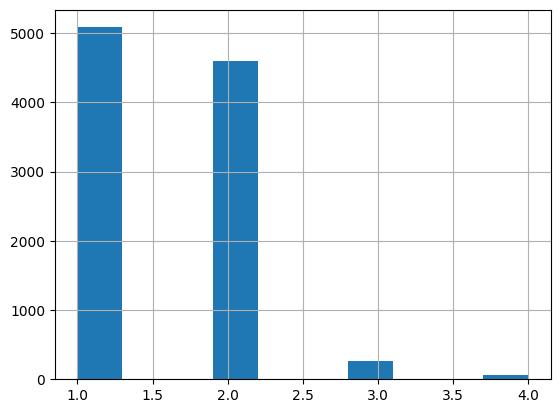

In [28]:
df.NumOfProducts.hist()

In [29]:
df.query('NumOfProducts >=3').NumOfProducts.count()

326

Большинство клиентов используют один или два продукта банка. 

Клиентов, использующих 3 и более продуктов, всего 326 из 10 000.

In [30]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Примерно 7000 клиентов имеют кредитную карту и около 3000 не имеет её.

In [31]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Активность клиентов раздлена примерно на равные части, пополам.

In [32]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: >

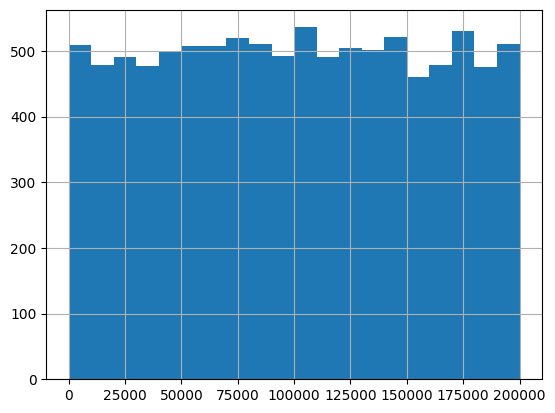

In [33]:
df.EstimatedSalary.hist(bins=20)

Предполагаемая зарплата `EstimatedSalary` имеет равномерное распределение. 

Исследование целевого признака `Exited`

In [34]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [35]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Имеется сильный дисбаланс целевого признака. Ответы распределены примерно 1:4, положительных признаков мало. 
    
То есть, модель всегда выдающая 0 на любые входные данные, будет угадывать в 80% случаях.

In [36]:
#доп проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  Int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [37]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


## Исследование задачи

In [38]:
#преобразование двух столбцов техникой OHE
data_ohe = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [39]:
data_ohe.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
6728,6729,15715208,Watkins,804,33,10,138335.96,1,1,1,80483.76,0,1,0,0
2636,2637,15591179,Skelton,702,30,2,0.00,2,1,1,145537.32,0,0,1,1
8729,8730,15656592,Toscano,646,48,8,169023.33,2,1,1,175657.55,0,1,0,1


###### После разделения получились выборки длиной 6000, 2000 и 2000. Это соответствует 60%, 20% и 20%

In [40]:
#отделение целевого признака из датасета data_ohe
target = data_ohe['Exited']

In [41]:
# отделение 80% на обучающую выборку и 20% на валидационную и тестовую выборки
features = data_ohe.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'] , axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    stratify=target, 
    random_state=12345)

In [42]:
#разделение оставшихся 40% ещё на две выборки по 20%
features_train, features_test, target_train, target_test = train_test_split(
    features_train, 
    target_train, 
    test_size=0.25, 
    stratify=target_train,
    random_state=12345)

Проверка размеров получившихся выборок

In [43]:
features_train.shape

(6000, 11)

In [44]:
target_train.shape

(6000,)

In [45]:
features_valid.shape

(2000, 11)

In [46]:
target_valid.shape

(2000,)

In [47]:
features_test.shape

(2000, 11)

In [48]:
target_test.shape

(2000,)

In [49]:
#список столбцов с числовыми признаками для масштабирования
numeric = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary']

In [50]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
#pd.options.mode.chained_assignment = None

StandardScaler()

In [51]:
features_train[numeric] = scaler.transform(features_train[numeric])

In [52]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [53]:
features_test[numeric] = scaler.transform(features_test[numeric])

In [54]:
features_train.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
571,0.011555,0.577533,-1.456283,-1.220573,-0.916018,1,0,-0.564271,0,0,1
6062,0.703382,-0.659257,1.114006,-1.220573,0.797767,1,1,-1.021994,0,1,1
4164,-0.143332,-0.468981,-1.134997,0.124404,-0.916018,0,0,-1.089912,0,0,1
8591,0.290351,0.006707,0.471434,-1.220573,-0.916018,0,1,1.479725,0,1,0
2398,0.579472,0.292120,1.114006,0.305718,-0.916018,1,1,-0.425391,0,1,0


In [55]:
features_valid.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7795,-1.981321,0.482396,0.792720,0.129702,-0.916018,1,0,1.362885,1,0,1
7500,0.455563,0.767809,-0.171138,-1.220573,0.797767,1,0,1.691065,0,0,1
8749,0.341979,0.767809,-1.134997,-1.220573,0.797767,1,0,0.847595,0,0,1
8012,1.002829,-0.468981,1.756578,-1.220573,0.797767,1,1,-0.859337,0,0,0
632,1.952801,-0.564119,1.756578,-0.011013,-0.916018,1,0,-0.652297,0,1,0


In [56]:
features_test.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6693,-0.133006,-1.134945,-1.456283,0.842608,-0.916018,1,0,-0.928374,0,0,1
4625,-1.444380,0.577533,1.756578,0.440681,0.797767,0,1,-0.388093,0,0,0
2705,0.052858,-0.468981,-0.171138,0.536083,0.797767,1,0,0.587724,0,1,0
2668,-1.299819,1.243497,-0.813711,0.185829,-0.916018,1,0,1.280460,0,0,1
5489,0.806639,-0.564119,1.114006,0.858088,-0.916018,0,1,-1.114359,0,0,1


###### Проверка распределения нулей и единиц в получившихся выборках

In [57]:
target_train.mean()

0.20383333333333334

In [58]:
target_valid.mean()

0.2035

In [59]:
target_test.mean()

0.2035

распределение нулей и единиц довольно равномерное, отличия только в третьем знаке.

<div class="alert alert-block alert-info">
    
решающее дерево `DecisionTreeClassifier`
</div>

In [60]:
#поиск лучшей модели Решающего дерева
best_res_tree = 0

for j in range(1,13,1): #max_depth
    for i in range(2,10,1): #min_samples_split
        for k in range(2,10,1): #min_samples_leaf
        
            model = DecisionTreeClassifier(max_depth=j, random_state=12345, min_samples_split=i, min_samples_leaf=k)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            
            if f1 > best_res_tree:
                best_res_tree = f1
                max_depth = j
                min_samples_split = i
                min_samples_leaf = k
            
   
print('-----THE BEST OF TREE-----')
print('f1=', best_res_tree)
print('max_depth =', max_depth)
print('min_samples_split =', min_samples_split)
print('min_samples_leaf =', min_samples_leaf)

-----THE BEST OF TREE-----
f1= 0.593342981186686
max_depth = 8
min_samples_split = 2
min_samples_leaf = 6


In [61]:
model = DecisionTreeClassifier(max_depth=8, random_state=12345, min_samples_split=2, min_samples_leaf=6)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [62]:
f1_score(target_valid, predictions)

0.593342981186686

In [63]:
#функция для построения графика ROC кривой
def ROC_curve(features, target):
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)

    plt.figure()
    plt.plot(fpr, tpr)

    # ROC-кривая случайной модели
    plt.plot([0, 1.0], [0, 1.0], linestyle='--')

    #установка границ осей от 0 до 1
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    #подписьи к осям "False Positive Rate" и "True Positive Rate" >
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    #заголовок к графику"ROC-кривая"
    plt.title('ROC-кривая')
    plt.show()

In [64]:
#функция для расчета auc_roc через вероятность
def auc_roc(features, target):
    probabilities_valid = model.predict_proba(features)
    probabilities_one_valid = probabilities_valid[:, 1]

    auc_roc = roc_auc_score(target, probabilities_one_valid)

    print(auc_roc)

In [65]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8116136166983625


In [66]:
roc_auc_score(target_valid, predictions)

0.7270467694196509

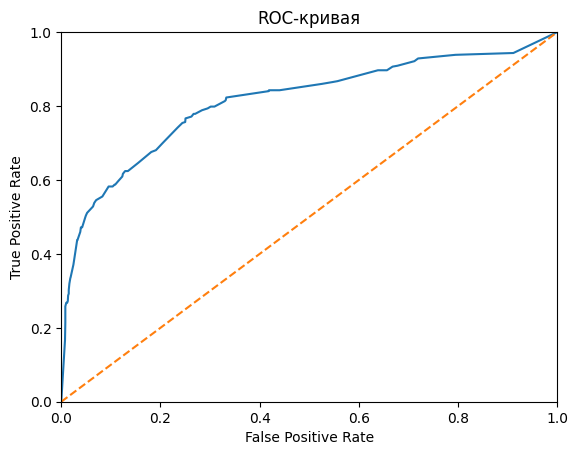

In [67]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

проверка f1 на тестовой выборке

In [68]:
predictions = model.predict(features_test)

In [69]:
f1_score(target_test, predictions)

0.5962373371924747

In [70]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8289352526640664


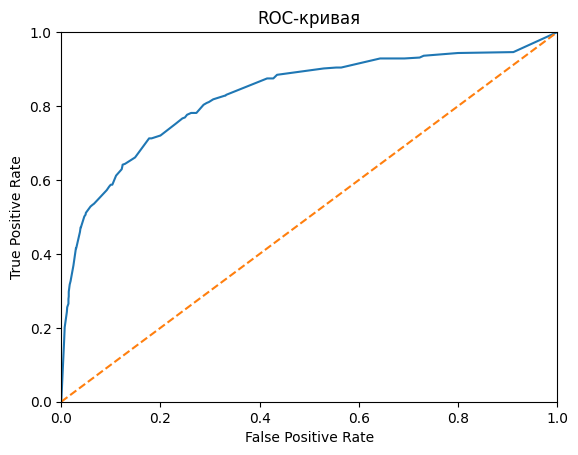

In [71]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

<div class="alert alert-block alert-info">
    
случайный лес `RandomForestClassifier`
</div>

In [72]:
#поиск лучшей модели леса
best_res = 0
n_est = 0
max_depth = 0
for i in range(20,120,20):
    #print('----------n_est=', i, '-------------')
    for j in range(4,20,1):
        model = RandomForestClassifier(n_estimators=i, 
                               max_depth=j, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_res:
            best_res = f1
            n_est = i
            max_depth = j
            #print(j, round(f1, 3))
   
print('-----THE BEST-----')
print('f1=', best_res)
print('n_est =', n_est)
print('max_depth =', max_depth)

-----THE BEST-----
f1= 0.5840978593272171
n_est = 20
max_depth = 16


#### Лучшая модель

In [73]:
model = RandomForestClassifier(n_estimators=20, 
                               max_depth=16, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.5840978593272171

In [74]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8456538202300914


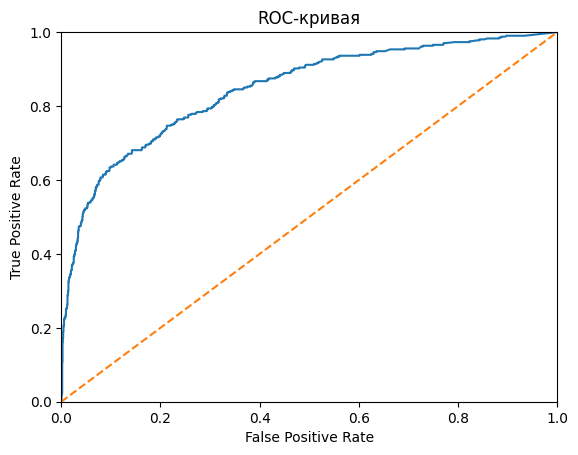

In [75]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

Проверка на тестовой выборке

In [76]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5688073394495412

In [77]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8443744206456071


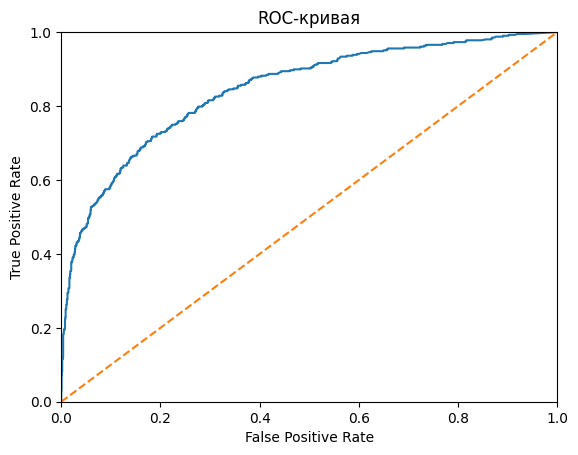

In [78]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

<div class="alert alert-block alert-info">

Модель "Логистическая регрессия" `LogisticRegression`

In [79]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=200)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)


0.29906542056074764

In [80]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.7746313339533677


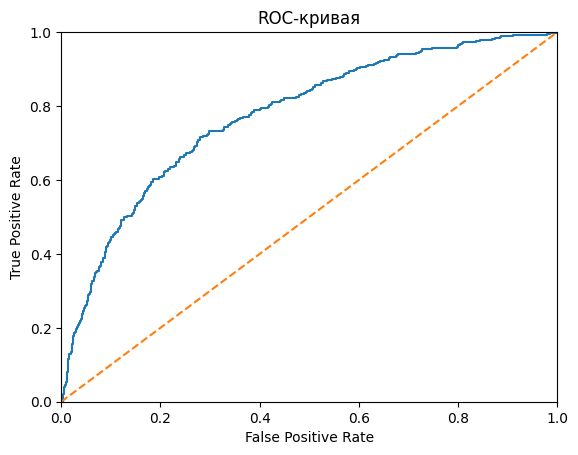

In [81]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [82]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.31835205992509363

In [83]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.7874176179260926


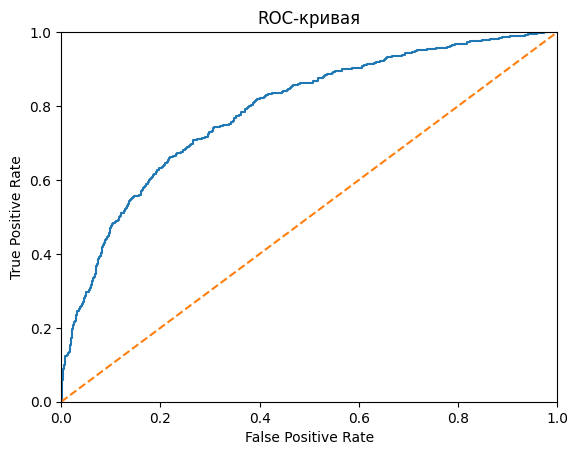

In [84]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

In [85]:
model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=200)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)


0.29906542056074764

In [86]:
auc_roc(features_valid, target_valid)

0.7746344187022153


проверка f1 на тестовой выборке

In [87]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.31835205992509363

In [88]:
auc_roc(features_test, target_test)

0.7874160755516688


In [89]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=200)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)


0.29906542056074764

In [90]:
model = LogisticRegression(random_state=12345, solver='sag', max_iter=200)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)


0.29906542056074764

In [91]:
model = LogisticRegression(random_state=12345, solver='saga', max_iter=200)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)


0.29906542056074764

###### Наилучший результат даёт логист регрессия с параметром solver='newton-cg', её метрика f1_score примерно 0.3

### Общий вывод

Без баллансировки классов.

Лучшие результаты у модели случайный лес.


Таблица с результатами разных моделей

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.593|0.596|0.812|0.829|
Случайный лес|0.584|0.568|0.846|0.844|
Логист.регрессия|0.299|0.318|0.775|0.787|


## Борьба с дисбалансом

In [92]:
#функция увеличения обьектов положительного класса
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [93]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [94]:
features_upsampled.shape

(9669, 11)

In [95]:
features_upsampled.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1584,0.218070,0.292120,-0.492424,-1.220573,0.797767,1,1,0.490674,0,1,0
8390,0.104487,0.862946,-1.456283,0.220232,0.797767,0,1,1.518622,0,0,0
5922,-0.979720,0.482396,-0.492424,0.471871,2.511553,1,0,-0.689491,0,0,0
3206,-1.392751,2.004598,1.435292,0.598994,-0.916018,1,0,-1.421232,1,0,1
7167,0.269699,-0.944670,0.792720,0.890925,-0.916018,0,0,1.547534,0,0,1


In [96]:
target_upsampled.shape

(9669,)

In [97]:
target_upsampled.unique()

array([0, 1])

In [98]:
#проверка балланса классов
target_upsampled.mean()

0.5059468404178302

Балланс классов примерно одинаков.

###### модель Решающее дерево

In [99]:
#поиск лучшей модели Решающего дерева
best_res_tree = 0

for j in range(1,13,1): #max_depth
    for i in range(2,10,1): #min_samples_split
        for k in range(2,10,1): #min_samples_leaf
        
            model = DecisionTreeClassifier(max_depth=j, random_state=12345, min_samples_split=i, min_samples_leaf=k)
            model.fit(features_upsampled, target_upsampled)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            
            if f1 > best_res_tree:
                best_res_tree = f1
                max_depth = j
                min_samples_split = i
                min_samples_leaf = k
            
   
print('-----THE BEST OF TREE-----')
print('f1=', best_res_tree)
print('max_depth =', max_depth)
print('min_samples_split =', min_samples_split)
print('min_samples_leaf =', min_samples_leaf)

-----THE BEST OF TREE-----
f1= 0.5732142857142858
max_depth = 6
min_samples_split = 2
min_samples_leaf = 2


In [100]:
model = DecisionTreeClassifier(max_depth=12, random_state=12345, min_samples_split=6, min_samples_leaf=2)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)


In [101]:
f1_score(target_valid, predictions)

0.5377456049638056

In [102]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.7208695598526107


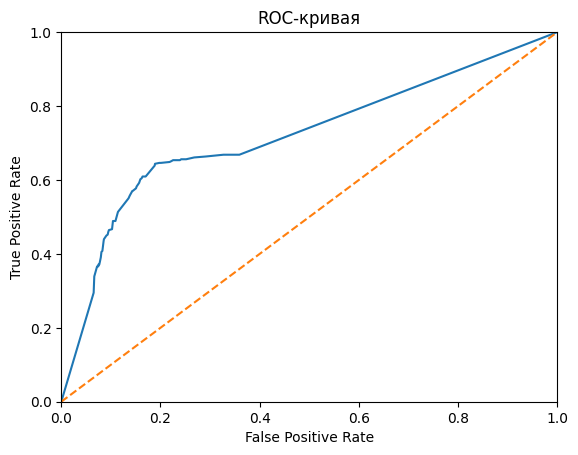

In [103]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [104]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5246913580246912

In [105]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)


0.7287942796417373


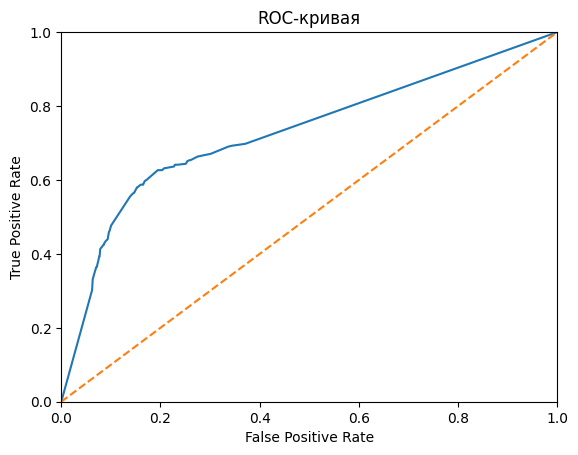

In [106]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

###### Проверка работы модели Случайный Лес

In [107]:
best_res = 0
n_est = 0
max_depth = 0
for i in range(20,120,20):
    #print('----------n_est=', i, '-------------')
    for j in range(2,13,1):
        model = RandomForestClassifier(n_estimators=i, 
                               max_depth=j, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_res:
            best_res = f1
            n_est = i
            max_depth = j
        #print(j, round(f1, 3))
   

print('-----THE BEST-----')
print('f1=', best_res)
print('n_est =', n_est)
print('max_depth =', max_depth)

-----THE BEST-----
f1= 0.6354378818737271
n_est = 60
max_depth = 8


In [108]:
# лучшая модель
model = RandomForestClassifier(n_estimators=60, 
                               max_depth=8, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=60,
                       random_state=12345)

In [109]:
#f1 на валидационной выборке
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.6354378818737271

In [110]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8677706982791729


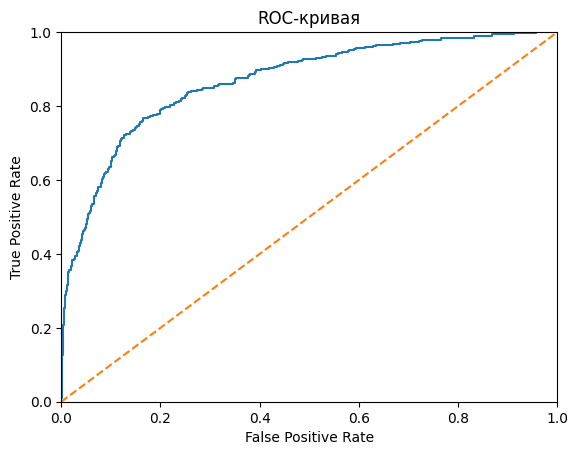

In [111]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [112]:
#f1 на тестовой выборке
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.6196319018404909

In [113]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)


0.8704019890460568


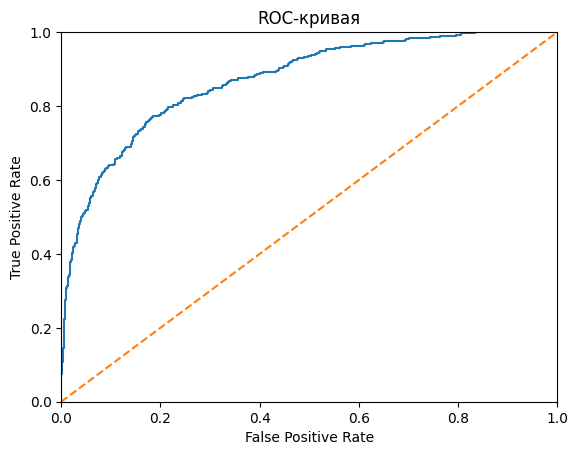

In [114]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

###### Модель Логистическая регрессия

In [115]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=200)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.5067114093959731

In [116]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.7812450354823237


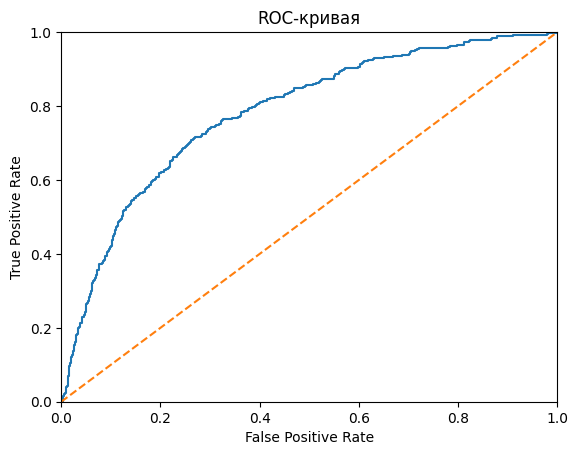

In [117]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [118]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5068493150684932

In [119]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.7918103002848766


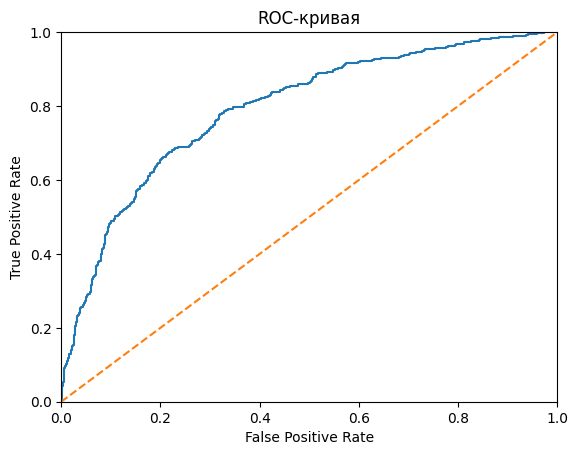

In [120]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

## Выводы (увеличение)

Увеличение количества редких обьектов привело к улучшению работы моделей.


Таблица с результатами разных моделей

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.537|0.524|0.721|0.729|
Случайный лес|0.635|0.620|0.868|0.870|
Логист.регрессия|0.507|0.507|0.781|0.792|

Наилучшими результатами обладает Случайный лес f1 = 0.635

<div class="alert alert-block alert-info">
    
Уменьшение количества обьектов

Функция для уменьшение количества обьектов

In [121]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    
    return features_downsampled, target_downsampled

In [122]:
#уменьшение обьектов частого класса в 4 раза
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [123]:
features_downsampled.shape

(2417, 11)

In [124]:
features_downsampled.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7746,-0.990046,-0.373843,1.114006,-1.220573,0.797767,1,1,1.330507,0,0,0
2869,-1.299819,-1.610633,1.435292,-1.220573,0.797767,1,0,-0.448448,0,0,1
1354,-0.401477,1.243497,0.792720,-1.220573,-0.916018,0,1,-0.462700,0,1,1
5412,1.333254,0.862946,-0.813711,0.624194,-0.916018,0,0,-0.022584,0,0,0
8353,-1.299819,-0.659257,0.471434,-1.220573,-0.916018,1,1,0.567351,0,1,0


In [125]:
target_downsampled.shape

(2417,)

In [126]:
#проверка балланса классов
target_downsampled.mean()

0.5059991725279271

###### модель Решающее дерево

In [127]:
#поиск лучшей модели Решающего дерева
best_res_tree = 0

for j in range(1,13,1): #max_depth
    for i in range(2,10,1): #min_samples_split
        for k in range(2,10,1): #min_samples_leaf
        
            model = DecisionTreeClassifier(max_depth=j, random_state=12345, min_samples_split=i, min_samples_leaf=k)
            model.fit(features_downsampled, target_downsampled)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            
            if f1 > best_res_tree:
                best_res_tree = f1
                max_depth = j
                min_samples_split = i
                min_samples_leaf = k
            
   
print('-----THE BEST OF TREE-----')
print('f1=', best_res_tree)
print('max_depth =', max_depth)
print('min_samples_split =', min_samples_split)
print('min_samples_leaf =', min_samples_leaf)

-----THE BEST OF TREE-----
f1= 0.5912863070539419
max_depth = 6
min_samples_split = 2
min_samples_leaf = 8


In [128]:
#лучшая модель
model = DecisionTreeClassifier(max_depth=6, random_state=12345, min_samples_split=2, min_samples_leaf=8)
model.fit(features_downsampled, target_downsampled)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=12345)

In [129]:
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.5912863070539419

In [130]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)


0.838666092903381


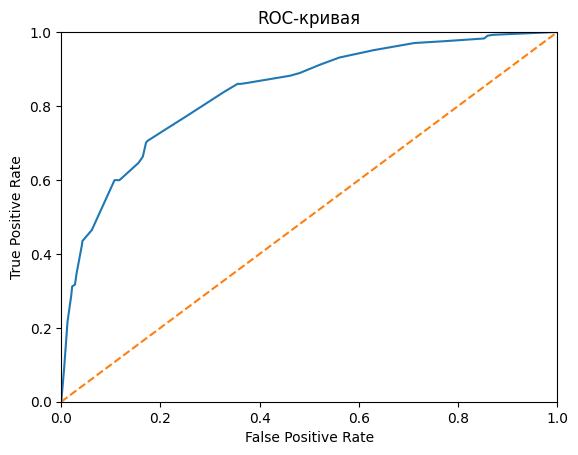

In [131]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [132]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5969543147208122

In [133]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8455905828787185


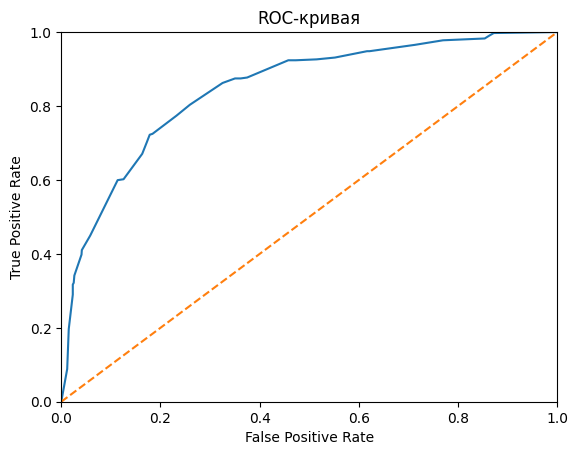

In [134]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

###### Проверка работы модели Случайный Лес

In [135]:
best_res = 0
n_est = 0
max_depth = 0
for i in range(20,120,20):
    #print('----------n_est=', i, '-------------')
    for j in range(2,13,1):
        model = RandomForestClassifier(n_estimators=i, 
                               max_depth=j, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_res:
            best_res = f1
            n_est = i
            max_depth = j
        #print(j, round(f1, 3))
   

print('-----THE BEST-----')
print('f1=', best_res)
print('n_est =', n_est)
print('max_depth =', max_depth)

-----THE BEST-----
f1= 0.6181102362204725
n_est = 80
max_depth = 7


In [136]:
# лучшая модель
model = RandomForestClassifier(n_estimators=80, 
                               max_depth=7, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=80,
                       random_state=12345)

In [137]:
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.6181102362204725

In [138]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8678724949911389


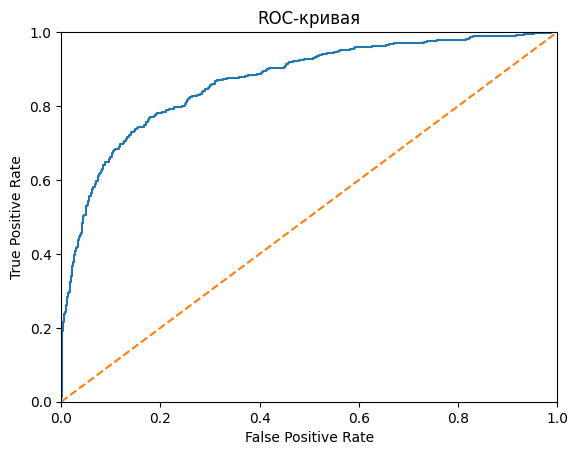

In [139]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [140]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.6116027531956735

In [141]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)


0.8740111451975858


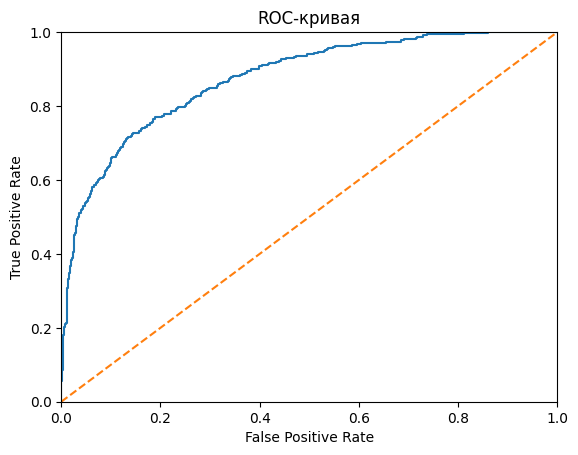

In [142]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

In [143]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=200)
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.5046102263202011

In [144]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.7799031697336782


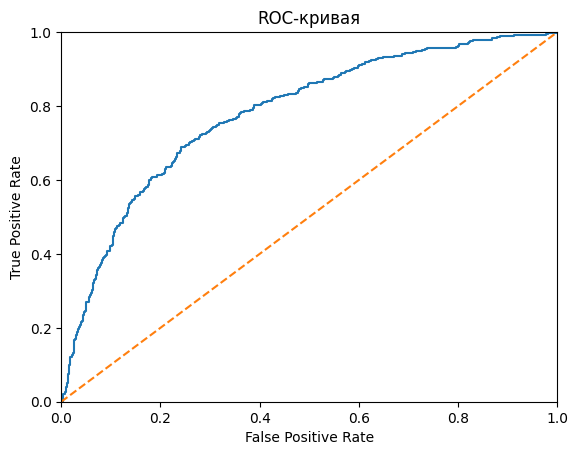

In [145]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [146]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5038560411311054

In [147]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.7912550454923337


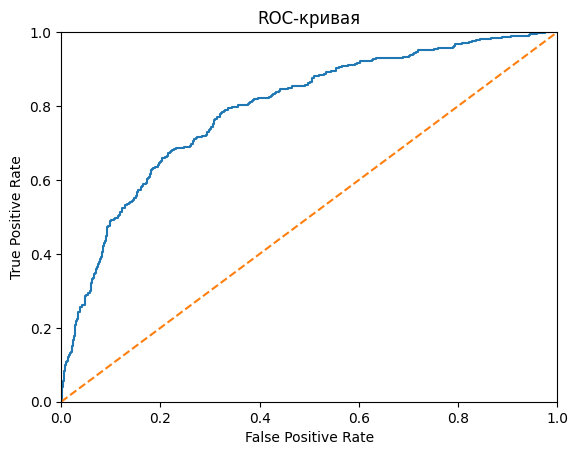

In [148]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

## Выводы (уменьшение)

Уменьшение количества частых обьектов привело к улучшению работы моделей.


Таблица с результатами разных моделей

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.591|0.597|0.839|0.846|
Случайный лес|0.618|0.611|0.868|0.874|
Логист.регрессия|0.505|0.504|0.780|0.791|

Наилучшими результатами обладает также Случайный лес f1 = 0.618

###### Проверка идеи: одновременно увеличить обьекты редкого класса в 2 раза и уменьшить частые в 2 раза

In [149]:
#увеличение обьектов (класса 1) в два раза
features_Nsampled, target_Nsampled = upsample(features_train, target_train, 2)

In [150]:
#уменьшение обьектов частого класса в 2 раза (класс 0)
features_Nsampled, target_Nsampled = downsample(features_Nsampled, target_Nsampled, 0.5)

In [151]:
features_Nsampled.shape

(4834, 11)

In [152]:
target_Nsampled.shape

(4834,)

In [153]:
target_Nsampled.mean()

0.5059991725279271

###### модель Решающее дерево

In [154]:
#поиск лучшей модели Решающего дерева
best_res_tree = 0

for j in range(1,13,1): #max_depth
    for i in range(2,10,1): #min_samples_split
        for k in range(2,10,1): #min_samples_leaf
        
            model = DecisionTreeClassifier(max_depth=j, random_state=12345, min_samples_split=i, min_samples_leaf=k)
            model.fit(features_Nsampled, target_Nsampled)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            
            if f1 > best_res_tree:
                best_res_tree = f1
                max_depth = j
                min_samples_split = i
                min_samples_leaf = k
                roc_auc = roc_auc_score(target_valid, predictions)
            
   
print('-----THE BEST OF TREE-----')
print('f1 =', best_res_tree)
print('roc_auc =', roc_auc)
print('max_depth =', max_depth)
print('min_samples_split =', min_samples_split)
print('min_samples_leaf =', min_samples_leaf)

-----THE BEST OF TREE-----
f1 = 0.5768463073852296
roc_auc = 0.758991657296742
max_depth = 8
min_samples_split = 2
min_samples_leaf = 5


In [155]:
model = DecisionTreeClassifier(max_depth=8, random_state=12345, min_samples_split=2, min_samples_leaf=5)
model.fit(features_Nsampled, target_Nsampled)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.5768463073852296

In [156]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8175417327959702


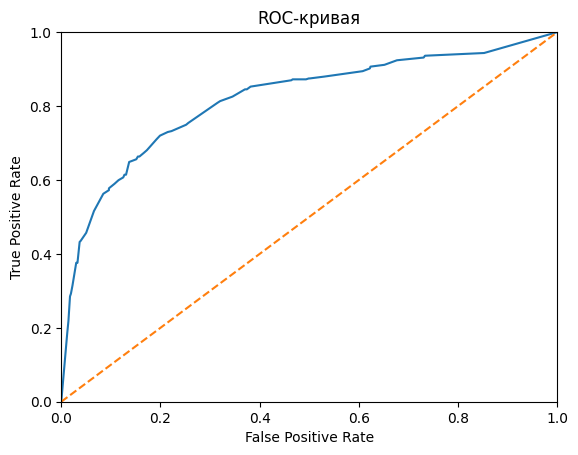

In [157]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [158]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.5663716814159292

In [159]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8092645804510212


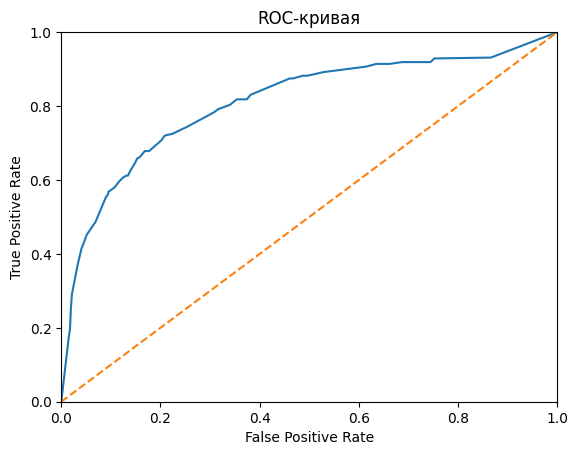

In [160]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

###### Проверка работы модели Случайный Лес

In [161]:
best_res = 0
n_est = 0
max_depth = 0
for i in range(20,120,20):
    #print('----------n_est=', i, '-------------')
    for j in range(2,13,1):
        model = RandomForestClassifier(n_estimators=i, 
                               max_depth=j, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
        model.fit(features_Nsampled, target_Nsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_res:
            best_res = f1
            n_est = i
            max_depth = j
            roc_auc = roc_auc_score(target_valid, predictions)
        #print(j, round(f1, 3))
   

print('-----THE BEST-----')
print('f1=', best_res)
print('roc_auc =', roc_auc)
print('n_est =', n_est)
print('max_depth =', max_depth)

-----THE BEST-----
f1= 0.6332992849846782
roc_auc = 0.7986006036853495
n_est = 100
max_depth = 9


In [162]:
model = RandomForestClassifier(n_estimators=100, 
                               max_depth=9, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_Nsampled, target_Nsampled)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.6332992849846782

In [163]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)


0.8696847849390222


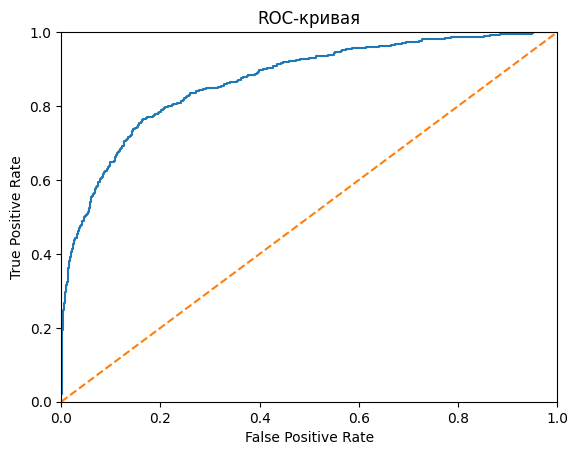

In [164]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [165]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.6118355065195586

In [166]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8687732416545977


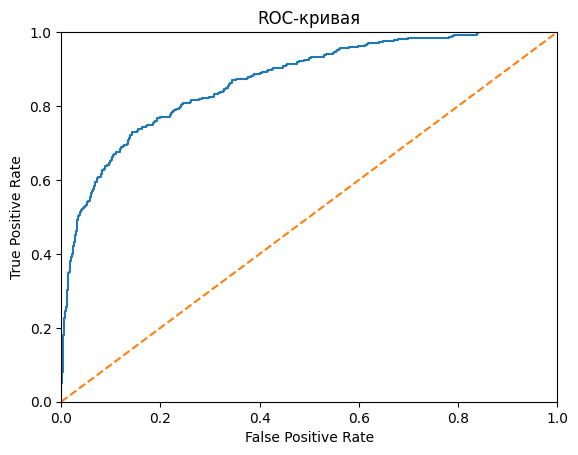

In [167]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

## Выводы (одновременно увеличение и уменьшение)

Одновременное увеличение и уменьшение количества обьектов также привело к улучшению работы моделей, по сравнению с нне масштабированными выборками.


Таблица с результатами разных моделей

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.577|0.566|0.818|0.809|
Случайный лес|0.633|0.612|0.870|0.869|
Логист.регрессия|  |    |    |   |

Наилучшими результатами обладает также Случайный лес f1 = 0.633

### Общие выводы:
    Наилучшие результаты даёт модель случайный лес при увеличении обьектов редкого класса.
    Попытка одновременно уменьшить обьекты частого класса и увеличить редкого - не дала выигрыша
    


## Тестирование модели

Так как самая выигрышная модель - Случайный лес, для тестирования возьму её. 

С увеличением обьектов редкого класса в 4 раза

In [168]:
# лучшая модель
model = RandomForestClassifier(n_estimators=60, 
                               max_depth=8, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=60,
                       random_state=12345)

In [169]:
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.6354378818737271

In [170]:
#расчет auc_roc для валидационной выборки
auc_roc(features_valid, target_valid)

0.8677706982791729


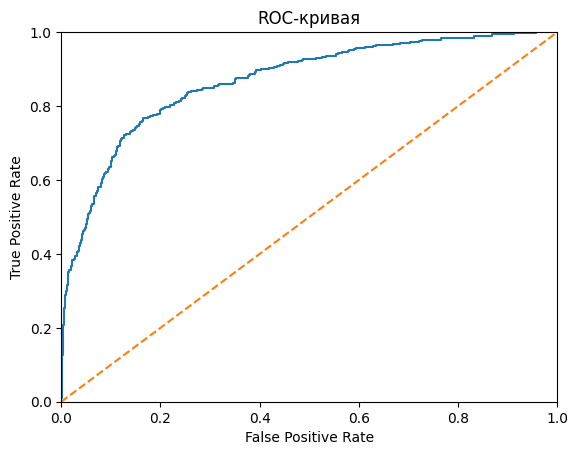

In [171]:
#ROC-кривая для валидационной выборки
ROC_curve(features_valid, target_valid)

In [172]:
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.6196319018404909

In [173]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8704019890460568


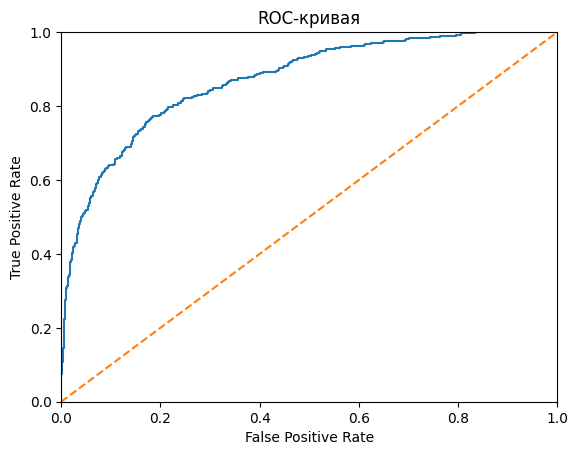

In [174]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

<div class="alert alert-info" style="border-color: #0080FF; border-radius: 5px">
   
<p>Обьединение обучающей выборки с валидационной</p>     
</div>

In [175]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)

In [176]:
features_train.shape

(6000, 11)

In [177]:
features_full_train.shape

(8000, 11)

In [178]:
features_valid.shape

(2000, 11)

In [179]:
features_upsampled.shape

(12890, 11)

In [180]:
features_upsampled.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5316,0.042532,0.101845,0.150148,0.470478,-0.916018,1,0,1.275554,0,1,1
8719,0.424586,0.482396,0.471434,0.924628,0.797767,1,1,1.691826,0,0,0
1798,0.662079,1.148359,-0.171138,0.192463,2.511553,0,0,-1.639517,0,0,0
3601,-0.432454,1.053222,0.471434,-1.220573,-0.916018,1,0,-0.115445,0,0,1
3721,0.837617,0.196983,1.435292,1.215486,-0.916018,1,1,-0.198598,0,0,0


In [181]:
target_upsampled.shape

(12890,)

Обучение модели случайного леса на обьединённой выборке.
И расчёт метрик на тестовой выборке

In [182]:
model = RandomForestClassifier(n_estimators=60, 
                               max_depth=8, 
                               random_state=12345, 
                               min_samples_split=2, 
                               min_samples_leaf=2
                                  )
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
f1_score(target_test, predictions)

0.6199794026776518

In [183]:
#расчет auc_roc для тестовой выборки
auc_roc(features_test, target_test)

0.8766455207133173


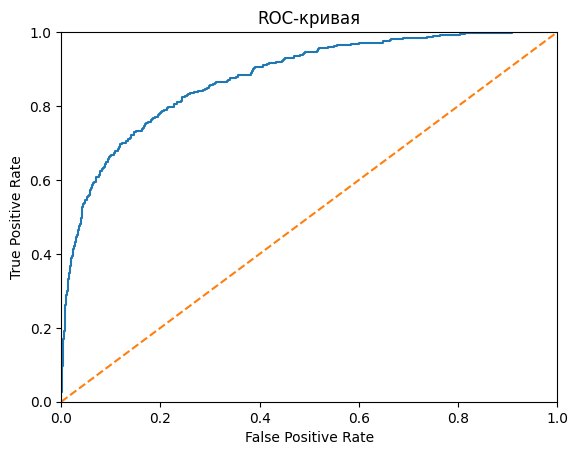

In [184]:
#ROC-кривая для тестовой выборки
ROC_curve(features_test, target_test)

###### Сравнение модели с DummyClassifier

In [185]:
#Стратегия strategy='most_frequent' обучение с наиболее часто встречающимся значением
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
#accuracy_score(target_test, dummy_pred)
f1_score(target_test, dummy_pred)

0.3381803074366431

In [186]:
np.unique(dummy_pred)

array([1])

In [187]:
#Стратегия strategy='prior'
dummy = DummyClassifier(strategy='prior')
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.3381803074366431

In [188]:
np.unique(dummy_pred)

array([1])

In [189]:
#Стратегия strategy='stratified'
dummy = DummyClassifier(strategy='stratified')
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.2888086642599278

In [190]:
np.unique(dummy_pred)

array([0, 1])

In [191]:
#Стратегия strategy='uniform'
dummy = DummyClassifier(strategy='uniform')
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.2629310344827587

In [192]:
np.unique(dummy_pred)

array([0, 1])

In [193]:
#Стратегия strategy='constant' для константы 0
dummy = DummyClassifier(strategy='constant', constant = 0)
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.0

In [194]:
np.unique(dummy_pred)

array([0])

In [195]:
#Стратегия strategy='constant' для константы 1
dummy = DummyClassifier(strategy='constant', constant = 1)
dummy.fit(features_upsampled, target_upsampled)
dummy_pred = dummy.predict(features_test)
f1_score(target_test, dummy_pred)

0.3381803074366431

In [196]:
np.unique(dummy_pred)

array([1])

Во всех случаях модель Случайный лес имеет большую f1 чем разные модели DummyClassifier

## Выводы

**Проведено исследование различных моделей классификации.**


Исходные данные имеют числовые и категориальные признаки. 

Так же есть признаки которые не могут влиять на обучение модели:

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия

Для дальнейшей работы эти признаки были удалены.


- Сбалансированность целевого признака в исходном датасете составляет около 20%, то есть данные сбалансированы плохо.

**что сделали**
- Проведено масштабирование всех числовых признаков
- Произведено увеличение редких обьектов
- Произведено уменьшенье частых обьектов
- исследованы различные модели без баллансировки классов
- Исследованы различные модели с баллансировкой классов

**Получены следующие результаты**
-- -- 
Исследование моделей без баллансировки классов

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.593|0.596|0.812|0.829|
Случайный лес|0.584|0.568|0.846|0.844|
Логист.регрессия|0.299|0.318|0.775|0.787|

-- --
**Исследование моделей с баллансировкой классов**

-- -- 
Увеличение количества редких обьектов 

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.537|0.524|0.721|0.729|
Случайный лес|0.635|0.620|0.868|0.870|
Логист.регрессия|0.507|0.507|0.781|0.792|

-- -- 
Уменьшение количества частых обьектов

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.591|0.597|0.839|0.846|
Случайный лес|0.618|0.611|0.868|0.874|
Логист.регрессия|0.505|0.504|0.780|0.791|

-- --
Одновременное увеличение и уменьшение количества обьектов

Имя_модели|f1_валид|f1_тест |roc_auc_валид|roc_auc_тест|
----------|--------|--------|-------------|------------|
Решающее дерево|0.577|0.566|0.818|0.809|
Случайный лес|0.633|0.612|0.870|0.869|
Логист.регрессия|  |    |    |   |

-- --
Наилучшие результаты имеет модель "Случайный лес", после баллансирования классов, и именно при увеличении обьектов редкого класса. Мера F1 = 0.635

Уменьшение обьектов частого класса так же дало нужный результат, но слабее чем при увеличении. Мера F1 = 0.618

Одновременное увеличение редких и уменьшение количества частых обьектов также улучшило показатели моделей. Мера F1 = 0.633

Максимально достигнутое значение меры f1 составило 0.635 на валидационной выборке и 0.620 на тестовой.

Сравнение модели "Случайный лес" с различными моделями DummyClassifier показало, что полученная модель предсказывает лучше, чем любая модель DummyClassifier.
